# Credit Risk EDA (student style)
Quick look at the Kaggle credit risk dataset before training a model.

## What the columns mean
- `person_age`, `person_income`, `person_emp_length`: age, yearly income, years working
- `person_home_ownership`: RENT/OWN/MORTGAGE/OTHER
- `loan_intent`: why they want the loan (MEDICAL, EDUCATION, etc.)
- `loan_grade`: letter grade A–G (A is best / lowest risk, G is worst / high interest)
- `loan_amnt`, `loan_int_rate`, `loan_percent_income`: amount, interest %, share of income
- `cb_person_default_on_file`: Y/N if they already defaulted before
- `cb_person_cred_hist_length`: years of credit history
- `loan_status`: target (1 = default, 0 = paid)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline
sns.set_theme(style='whitegrid')

df = pd.read_csv(Path('/home/jbarone/dev/capstone_1/data/raw/credit_risk_dataset.csv'))
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [42]:
df.shape, df.dtypes

((32581, 12),
 person_age                      int64
 person_income                   int64
 person_home_ownership          object
 person_emp_length             float64
 loan_intent                    object
 loan_grade                     object
 loan_amnt                       int64
 loan_int_rate                 float64
 loan_status                     int64
 loan_percent_income           float64
 cb_person_default_on_file      object
 cb_person_cred_hist_length      int64
 dtype: object)

In [43]:
df.isna().sum().sort_values(ascending=False)

loan_int_rate                 3116
person_emp_length              895
person_income                    0
person_age                       0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [44]:
target_rate = df['loan_status'].mean()
print('Default rate ~', round(target_rate*100,2), '%')
df['loan_status'].value_counts(normalize=True)

Default rate ~ 21.82 %


loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

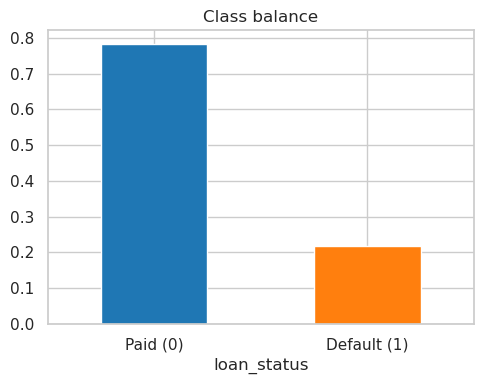

In [45]:
fig, ax = plt.subplots(figsize=(5,4))
df['loan_status'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=ax, color=['tab:blue','tab:orange'])
ax.set_xticklabels(['Paid (0)','Default (1)'], rotation=0)
ax.set_title('Class balance')
plt.tight_layout()

In [46]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


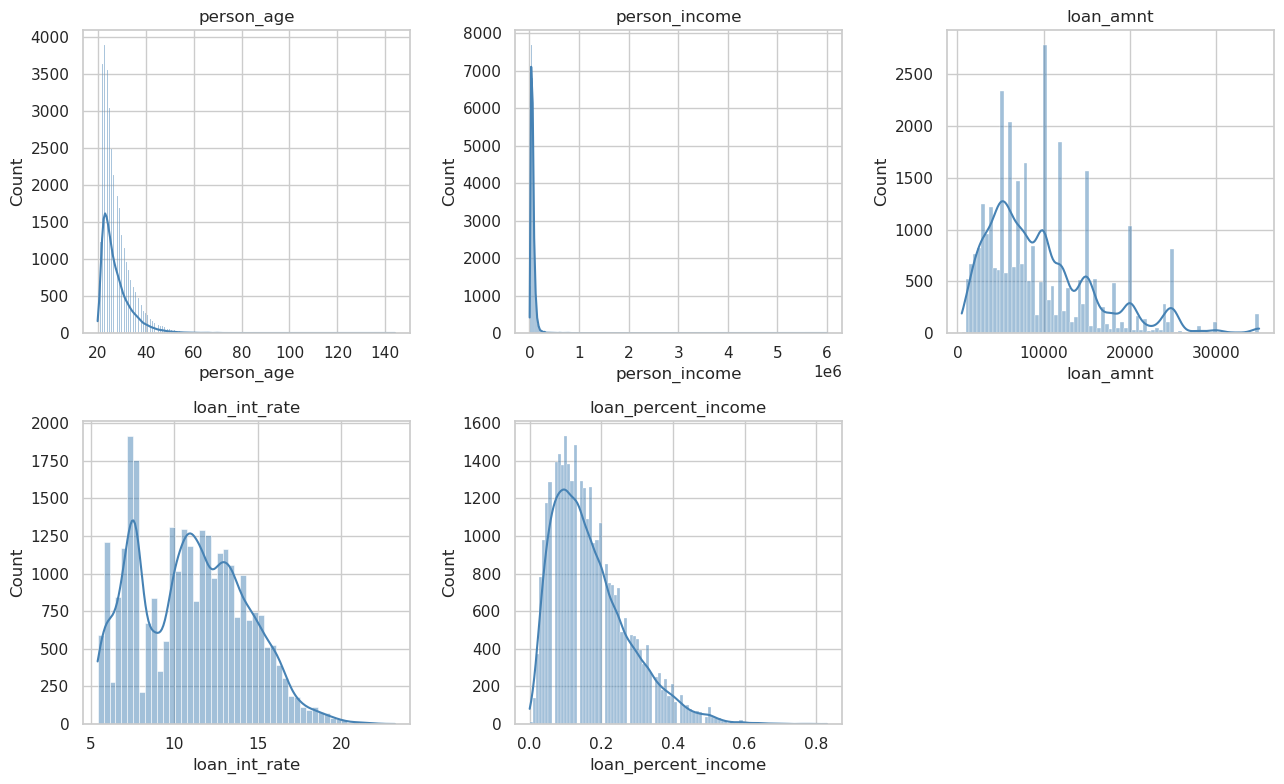

In [47]:
num_features = ['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income']
fig, axes = plt.subplots(2, 3, figsize=(13,8))
axes = axes.flatten()
for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(col)
axes[-1].axis('off')
plt.tight_layout()

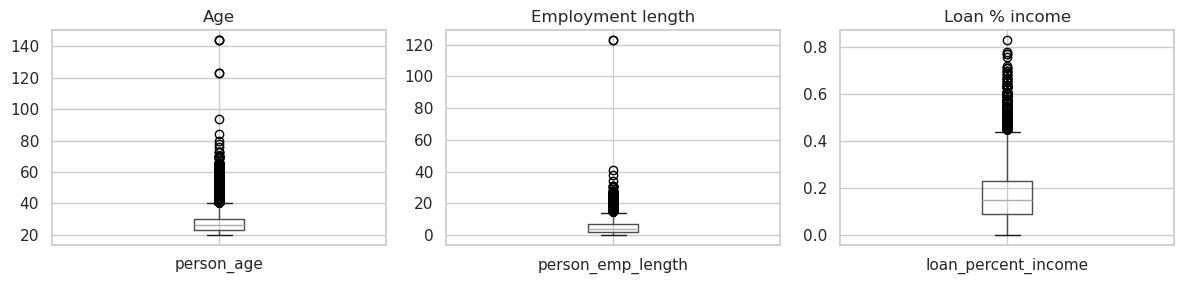

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))
df.boxplot(column=['person_age'], ax=axes[0])
axes[0].set_title('Age')
df.boxplot(column=['person_emp_length'], ax=axes[1])
axes[1].set_title('Employment length')
df.boxplot(column=['loan_percent_income'], ax=axes[2])
axes[2].set_title('Loan % income')
plt.tight_layout()

In [49]:
# Spot extreme ages / employment lengths
print('Age quantiles:', df['person_age'].quantile([0.5,0.9,0.95,0.99,0.999]))
print('Max age:', df['person_age'].max())
print('Rows age > 100:', (df['person_age']>100).sum())
print('Emp length quantiles:', df['person_emp_length'].quantile([0.5,0.9,0.95,0.99,0.999]))
print('Max emp length:', df['person_emp_length'].max())
print('Rows emp length > 60:', (df['person_emp_length']>60).sum())

Age quantiles: 0.500    26.0
0.900    36.0
0.950    40.0
0.990    50.0
0.999    66.0
Name: person_age, dtype: float64
Max age: 144
Rows age > 100: 5
Emp length quantiles: 0.500     4.0
0.900    10.0
0.950    13.0
0.990    18.0
0.999    25.0
Name: person_emp_length, dtype: float64
Max emp length: 123.0
Rows emp length > 60: 2


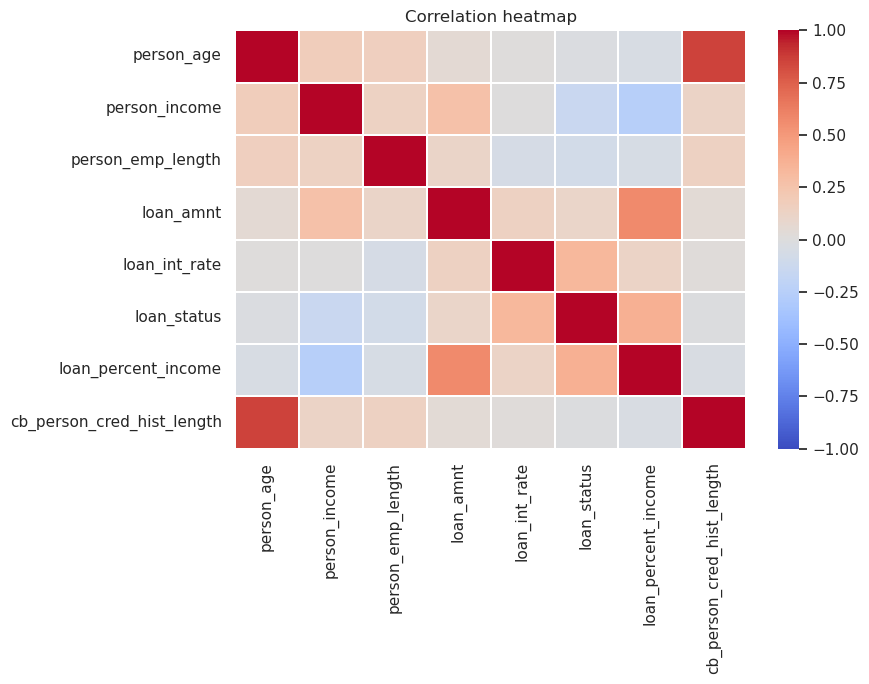

In [50]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.3)
plt.title('Correlation heatmap')
plt.tight_layout()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64


/tmp/ipykernel_824482/2087752828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_default, x='loan_grade', y='default_rate', palette='magma')


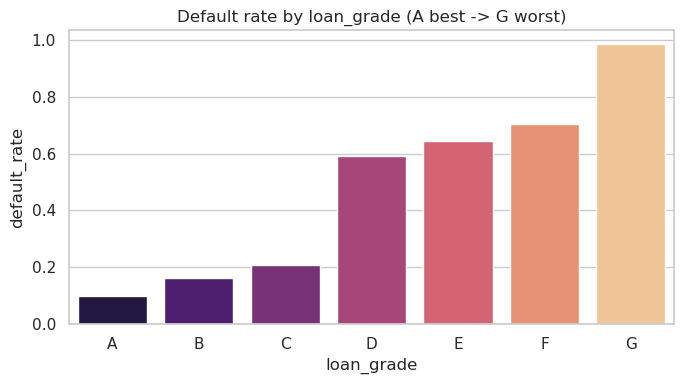

In [51]:
# Loan grade: counts + default rate
print(df['loan_grade'].value_counts())
grade_default = df.groupby('loan_grade')['loan_status'].mean().reset_index().rename(columns={'loan_status':'default_rate'})
plt.figure(figsize=(7,4))
sns.barplot(data=grade_default, x='loan_grade', y='default_rate', palette='magma')
plt.title('Default rate by loan_grade (A best -> G worst)')
plt.tight_layout()

/tmp/ipykernel_824482/35902246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flag_default, x='cb_person_default_on_file', y='default_rate', palette='viridis')


cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


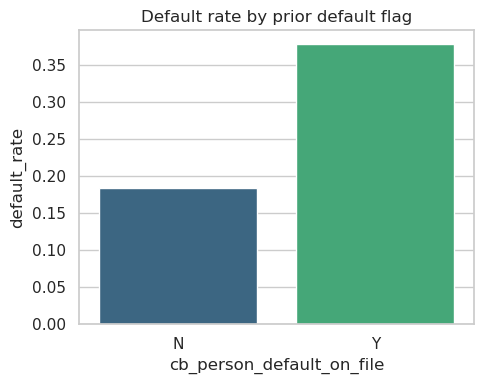

In [52]:
# Prior default flag effect
print(df['cb_person_default_on_file'].value_counts())
flag_default = df.groupby('cb_person_default_on_file')['loan_status'].mean().reset_index().rename(columns={'loan_status':'default_rate'})
plt.figure(figsize=(5,4))
sns.barplot(data=flag_default, x='cb_person_default_on_file', y='default_rate', palette='viridis')
plt.title('Default rate by prior default flag')
plt.tight_layout()

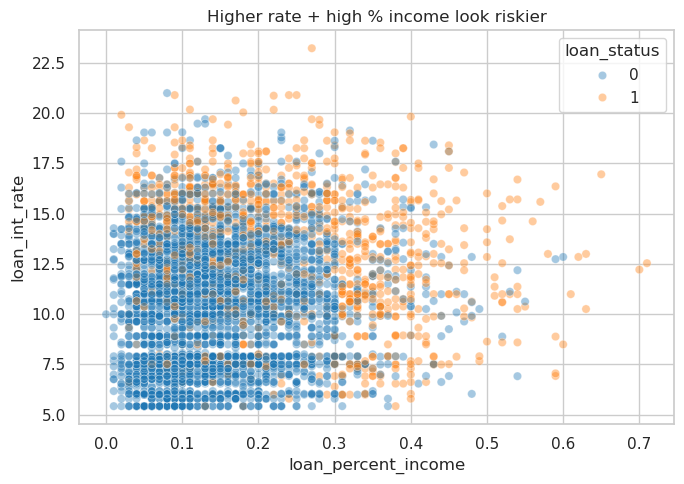

In [53]:
# Relationship between loan % income, interest rate and default
sampled = df.sample(n=min(len(df), 5000), random_state=42)
plt.figure(figsize=(7,5))
sns.scatterplot(data=sampled, x='loan_percent_income', y='loan_int_rate', hue='loan_status', alpha=0.4, palette=['tab:blue','tab:orange'])
plt.title('Higher rate + high % income look riskier')
plt.tight_layout()

## Notes and takeaways
- Target imbalance is real: ~20% defaults. If we ignore it, a model could predict everyone as "paid" and still get ~80% accuracy. We need class weights or SMOTE to make the minority class visible during training.
- Loan grade behaves like expected credit risk: A/B look safer, C/D/F/G have visibly higher default rates. Preserve this signal and consider an ordered encoding (A < B < C < ... < G) so tree/linear models can exploit the ranking.
- Prior default flag (`cb_person_default_on_file = Y`) is a strong risk indicator. Keep it as a categorical feature; if we one-hot encode, ensure it isn’t dropped in feature selection.
- Numeric correlations: higher `loan_int_rate` and higher `loan_percent_income` move together and align with more defaults (see heatmap + scatter). These two may be the most important continuous risk signals.
- Outliers/dirty data: there are ages > 100 and employment lengths > 60 years. These are likely data errors; cap them (e.g., age at 90, emp_length at 40) or drop extreme rows so they don’t distort scaling/training.
- Skewed tails: `loan_int_rate` and `loan_percent_income` have long right tails. Light winsorizing (e.g., 1st–99th percentile) or clipping at reasonable business limits can stabilize models and SHAP.
- Missingness is low (per the counts), so simple imputers (median for numerics, most frequent for categoricals) should be enough.
- Next steps for modeling pipeline: train/val split; one-hot encode `loan_intent`, `loan_grade`, `person_home_ownership`, `cb_person_default_on_file`; scale numeric columns; handle outliers; handle imbalance (class weights or SMOTE); then compare LogisticRegression vs RandomForest vs XGBoost and keep the best AUC.
- For storytelling in README: highlight that grade and prior defaults are the top categorical drivers, while interest rate and payment-to-income ratio are the top numeric drivers.
